In [72]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [73]:
train_path = r'/home/r0b0shubham96/Desktop/Hand Gesture/Train'
test_path = r'/home/r0b0shubham96/Desktop/Hand Gesture/Test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=2,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=2, shuffle=True)

imgs, labels = next(train_batches)

Found 557 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


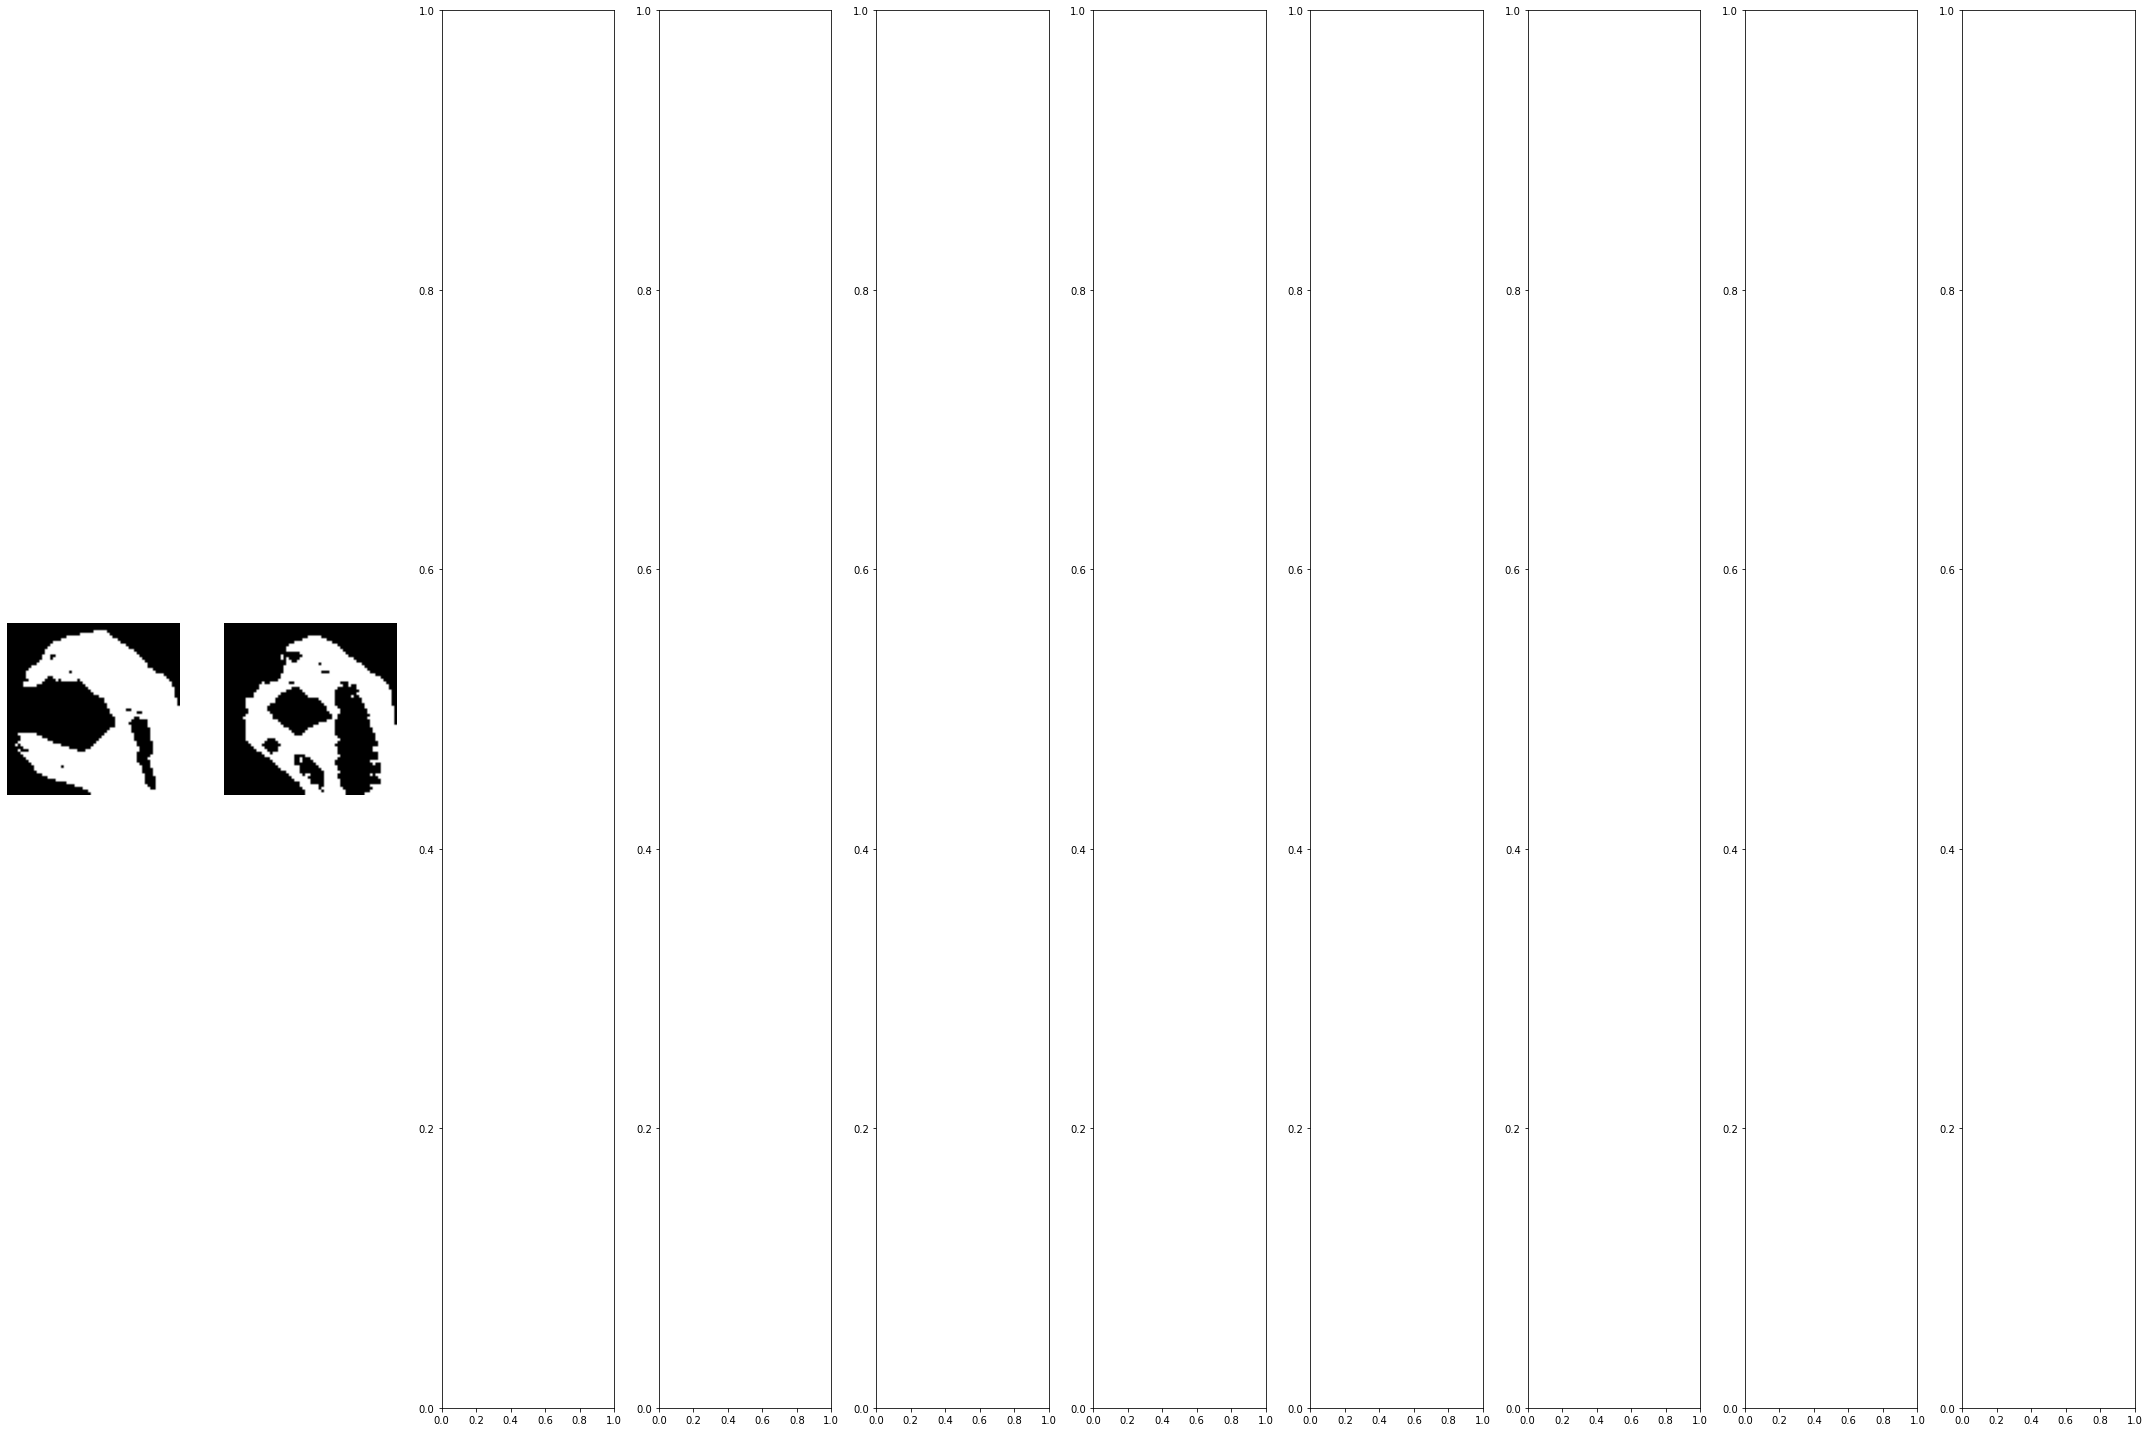

(2, 64, 64, 3)
[[1. 0.]
 [0. 1.]]


In [74]:
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [75]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(64,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10,activation ="relu"))
model.add(Dense(2,activation ="softmax"))

In [76]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 128)      

In [77]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [78]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)


Epoch 1/10
279/279 [==============================] - 5s 17ms/step - loss: 1.1673 - accuracy: 0.9425 - val_loss: 0.0030 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
279/279 [==============================] - 4s 14ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
275/279 [============================>.] - ETA: 0s - loss: 9.4442e-04 - accuracy: 1.0000

In [ ]:
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


loss of 2.5688948880997486e-05; accuracy of 100.0%


In [ ]:
#model.save('best_model_dataflair.h5')
model.save('best_model_dataflair3.h5')


In [ ]:
imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names



loss of 2.2053695829526987e-06; accuracy of 100.0%
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 ma

['loss', 'accuracy']

predictions on a small set of test data--

O   O   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


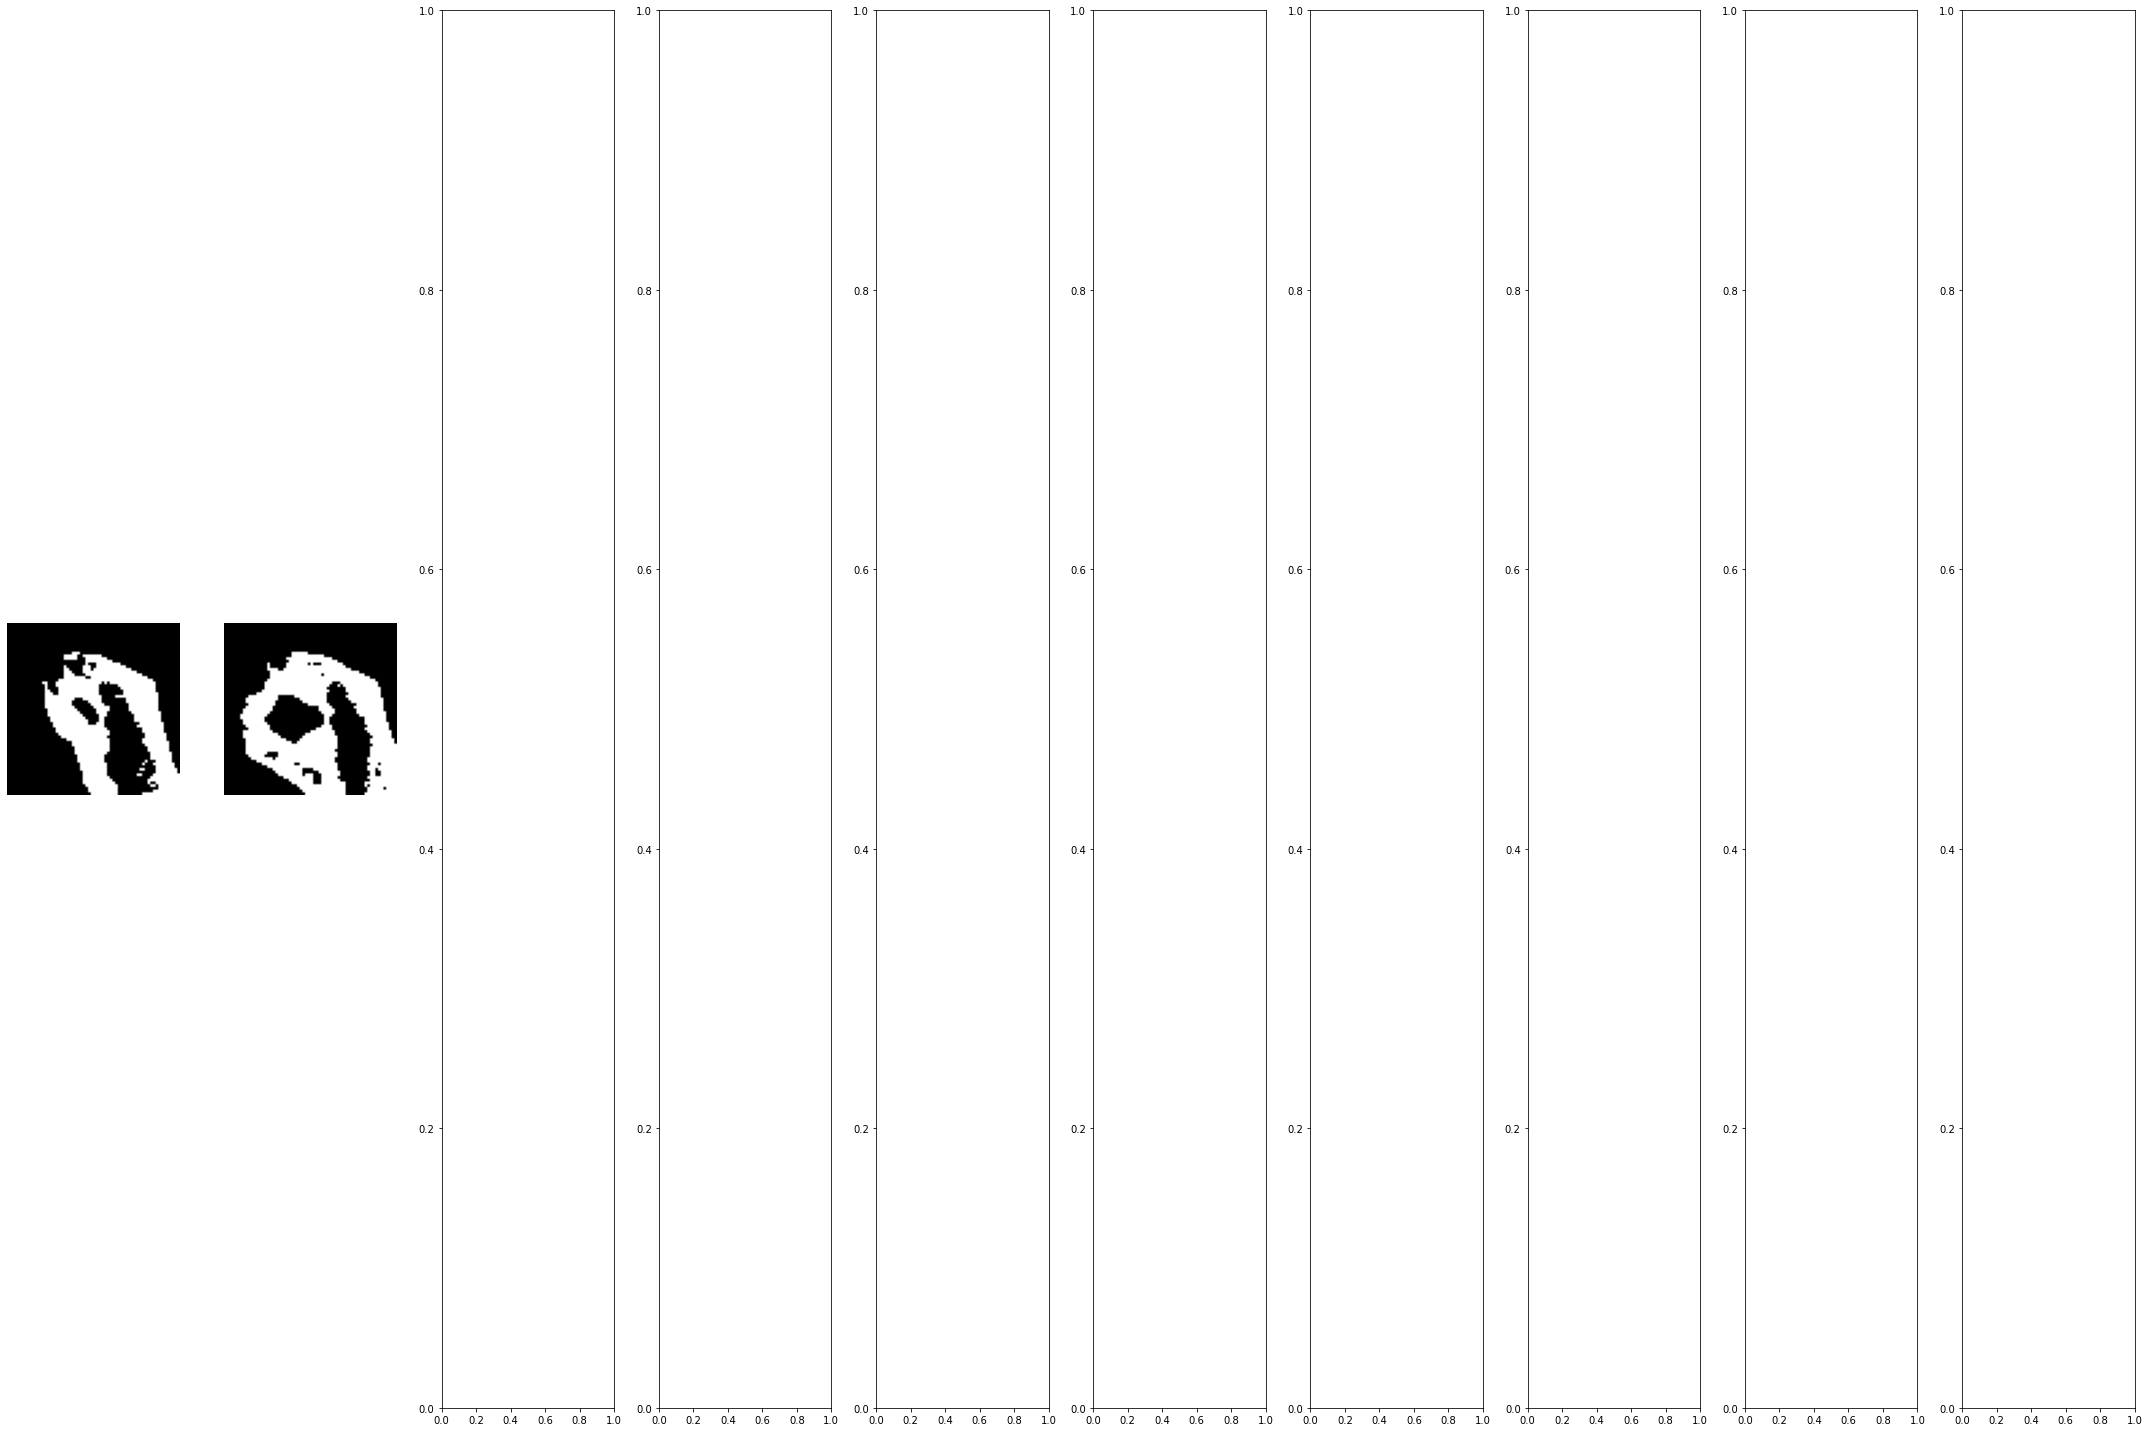

Actual labels
O   O   (2, 64, 64, 3)


In [ ]:
word_dict = {0:'C',1:'O'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

In [ ]:
history2.history

{'loss': [1.1417229175567627,
  0.0009581245831213892,
  0.00046040138113312423,
  0.00029931325116194785,
  0.000232617327128537,
  0.00020241232414264232,
  0.0001796429860405624,
  0.00016169586160685867,
  0.00014663400361314416,
  0.00013431688421405852],
 'accuracy': [0.9684385657310486, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0010057592298835516,
  0.0003835903771687299,
  0.00021733964968007058,
  0.00016171728202607483,
  0.00013463485811371356,
  0.00011715135769918561,
  0.00010377538274042308,
  9.2812639195472e-05,
  8.38333580759354e-05,
  7.673913933103904e-05],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005]}